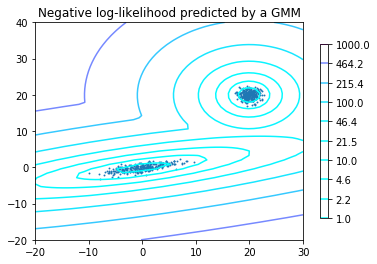

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import mixture

n_samples = 300
np.random.seed(0)

shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])  # 均值为20的标准正态分布随机样本

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2,  # 混合成分数量
                              covariance_type='full')  # String describing the type of covariance parameters to use
# covariance_type:{'full'(default), 'tied', 'diag', 'spherical'}
clf.fit(X_train)

x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)
CS = plt.contour(X, Y, Z, cmap=matplotlib.cm.cool,
                 levels=np.logspace(0, 3, 10))  # 绘制等高线图
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

##  返回值说明

In [219]:
clf.weights_  # 每个混合成分的权重

array([0.5, 0.5])

In [220]:
clf.means_  # 每个混合成分的均值

array([[-0.13607006, -0.07059606],
       [19.91453549, 19.97556345]])

In [221]:
clf.covariances_  # 每个混合成分的协方差矩阵

array([[[1.13328040e+01, 2.25048269e+00],
        [2.25048269e+00, 8.77009968e-01]],

       [[1.02179964e+00, 3.28158679e-03],
        [3.28158679e-03, 9.90375215e-01]]])

In [222]:
clf.predict(X_train)  # 预测X_trian每个样本的标签

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [223]:
clf.predict_proba(X_train)  # 预测X_trian每个样本的所属标签的后验概率

array([[1.02907417e-140, 1.00000000e+000],
       [5.50047064e-174, 1.00000000e+000],
       [8.77310251e-119, 1.00000000e+000],
       ...,
       [1.00000000e+000, 3.05250255e-145],
       [1.00000000e+000, 9.31990718e-194],
       [1.00000000e+000, 9.49518016e-139]])

In [224]:
clf.score_samples(X_train)  # Compute the weighted log probabilities for each sample.

array([-4.2993207 , -5.67415948, -4.86785056, -3.07027619, -2.63269362,
       -3.66556919, -2.89798594, -2.73820333, -3.77525822, -2.96327431,
       -5.75393007, -3.24078494, -6.29456772, -2.55883353, -4.93712952,
       -2.64676625, -4.77916253, -2.58732548, -4.13873971, -2.62026323,
       -3.96978566, -5.80255366, -2.71082646, -3.53147515, -3.69708073,
       -2.94452562, -3.29879662, -2.64198433, -2.6020622 , -2.74155599,
       -2.76163426, -4.25429366, -2.64299355, -3.82691184, -2.87061914,
       -2.87311965, -4.0155726 , -2.87461889, -2.99253407, -2.56531787,
       -3.54285713, -3.8421984 , -5.60081673, -3.33192453, -3.60312105,
       -3.37256478, -3.08418503, -2.90123154, -4.19545688, -2.65054736,
       -5.32592642, -3.72660635, -5.0782623 , -2.85281174, -5.64446203,
       -4.83466424, -4.72567123, -2.89896247, -3.06789141, -3.22670766,
       -3.22636785, -3.52856632, -2.72617991, -4.37138264, -2.91105757,
       -2.92787561, -2.70835739, -2.93444584, -2.76891304, -3.22

In [225]:
clf.score(X_train)  # clf.score_samples(X_train)的平均

-3.929988596601708

In [226]:
# clf.score_samples的计算过程
weighted_log_prob = clf._estimate_log_prob(X_train) + np.log(clf.weights_)
log_prob_norm = np.log(np.sum(np.exp(weighted_log_prob), axis=1))
log_prob_norm

array([-4.2993207 , -5.67415948, -4.86785056, -3.07027619, -2.63269362,
       -3.66556919, -2.89798594, -2.73820333, -3.77525822, -2.96327431,
       -5.75393007, -3.24078494, -6.29456772, -2.55883353, -4.93712952,
       -2.64676625, -4.77916253, -2.58732548, -4.13873971, -2.62026323,
       -3.96978566, -5.80255366, -2.71082646, -3.53147515, -3.69708073,
       -2.94452562, -3.29879662, -2.64198433, -2.6020622 , -2.74155599,
       -2.76163426, -4.25429366, -2.64299355, -3.82691184, -2.87061914,
       -2.87311965, -4.0155726 , -2.87461889, -2.99253407, -2.56531787,
       -3.54285713, -3.8421984 , -5.60081673, -3.33192453, -3.60312105,
       -3.37256478, -3.08418503, -2.90123154, -4.19545688, -2.65054736,
       -5.32592642, -3.72660635, -5.0782623 , -2.85281174, -5.64446203,
       -4.83466424, -4.72567123, -2.89896247, -3.06789141, -3.22670766,
       -3.22636785, -3.52856632, -2.72617991, -4.37138264, -2.91105757,
       -2.92787561, -2.70835739, -2.93444584, -2.76891304, -3.22

In [227]:
arr = np.array([[0, 0],  # 第一个高斯混合分布中心
                [8, 8],
                [20, 20],  # 均值处
                [30, 30],
                [100, 100]])

clf.predict_proba(arr)

array([[1.00000000e+000, 1.35336891e-171],
       [1.00000000e+000, 1.71222655e-039],
       [3.01884965e-139, 1.00000000e+000],
       [7.39172233e-268, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000]])

In [228]:
clf.score_samples(arr)  # 越远离高斯分布中心的点,其score_samples返回的值负的越小

array([-3.32603773e+00, -5.46804795e+01, -2.54083486e+00, -1.02716398e+02,
       -6.35331933e+03])